In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import plotly.express as px
import sklearn

%matplotlib inline
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Car%20Depriciation.csv')

In [18]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [20]:
df

,Car_Name,Year,Selling_Price,Initial_Price,KM_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Initial_Price', 'KM_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Initial_Price  301 non-null    float64
 4   KM_Driven      301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.shape

(301, 9)

In [9]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Year,301.000000,2013.627907,2.891554,2003.000000,2012.000000,2014.000000,2016.000000,2018.000000
Selling_Price,301.000000,4.661296,5.082812,0.100000,0.900000,3.600000,6.000000,35.000000
Initial_Price,301.000000,7.628472,8.644115,0.320000,1.200000,6.400000,9.900000,92.600000
KM_Driven,301.000000,36947.205980,38886.883882,500.000000,15000.000000,32000.000000,48767.000000,500000.000000
Owner,301.000000,0.043189,0.247915,0.000000,0.000000,0.000000,0.000000,3.000000


In [11]:
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
from tensorflow import keras

  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
                                              0.0/276.6 MB ? eta -:--:--
                                            0.0/276.6 MB 653.6 kB/s eta 0:07:04
                                              0.1/276.6 MB 1.1 MB/s eta 0:04:24
                                            0.1/276.6 MB 944.1 kB/s eta 0:04:53
                                              0.2/276.6 MB 1.2 MB/s eta 0:03:54
                                            0.2/276.6 MB 981.9 kB/s eta 0:04:42
                                            0.3/276.6 MB 983.9 kB/s eta 0:04:41
                                            0.3/276.6 MB 984.6 kB/s eta 0:04:41
                                            0.4/276.6 MB 998.3 kB/s eta 0:04:37
                                            0.4/276.6 MB 994.9 kB/s eta 0:04:38
                                              0.5/276.6 MB 1.0 MB/s eta 0:04:30
                                              0.6/276.6 MB 

In [22]:
from keras.layers import Dense,Dropout
from keras import Sequential

In [23]:
df.sample(3)

,Car_Name,Year,Selling_Price,Initial_Price,KM_Driven,Fuel_Type,Seller_Type,Transmission,Owner
198,Bajaj Discover 125,2011,0.15,0.57,35000,Petrol,Individual,Manual,1
232,elantra,2015,11.45,14.79,12900,Petrol,Dealer,Automatic,0
181,Hero Splender Plus,2016,0.30,0.48,50000,Petrol,Individual,Manual,0


In [24]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [25]:
df[df['Owner'] == 3]

,Car_Name,Year,Selling_Price,Initial_Price,KM_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


In [26]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Initial_Price    float64
KM_Driven          int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [27]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [28]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Initial_Price,KM_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [31]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [32]:
df['Transmission'] = df['Transmission'].map({'Manual':0,'Automatic':1})

In [33]:
df['Transmission'].value_counts()

0    261
1     40
Name: Transmission, dtype: int64

In [35]:
df.sample(2)

,Car_Name,Year,Selling_Price,Initial_Price,KM_Driven,Fuel_Type,Seller_Type,Transmission,Owner
121,Royal Enfield Thunder 350,2011,1.05,1.50,6900,0,Individual,0,0
95,corolla altis,2012,5.85,18.61,72000,0,Dealer,0,0


In [36]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [37]:
df['Seller_Type'] = df['Seller_Type'].map({'Dealer':0,'Individual':1})

In [38]:
df['Seller_Type'].value_counts()

0    195
1    106
Name: Seller_Type, dtype: int64

In [39]:
df.head()

,Car_Name,Year,Selling_Price,Initial_Price,KM_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [40]:
x = df.iloc[:,1:-1]

In [42]:
y = df.iloc[:,-1]

In [43]:
y

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Owner, Length: 301, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((225, 7), (76, 7), (225,), (76,))

In [47]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
x_train[0]

array([ 1.1484667 , -0.76334652, -0.74764685, -0.76147314, -0.48131271,
        1.3462912 , -0.36927447])

In [63]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=7))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1024      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9345 (36.50 KB)
Trainable params: 9345 (36.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])

In [123]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [124]:
history = model.fit(x_train,y_train,epochs=200,verbose=True,validation_data=(x_train,y_train),callbacks=callback)

Epoch 1/200
8/8 [==============================] - 0s 13ms/step - loss: 0.0437 - accuracy: 0.9644 - val_loss: 0.0423 - val_accuracy: 0.9644
Epoch 2/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0409 - accuracy: 0.9644 - val_loss: 0.0418 - val_accuracy: 0.9644
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0428 - accuracy: 0.9644 - val_loss: 0.0415 - val_accuracy: 0.9644
Epoch 4/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0414 - accuracy: 0.9644 - val_loss: 0.0411 - val_accuracy: 0.9644
Epoch 5/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0403 - accuracy: 0.9644 - val_loss: 0.0408 - val_accuracy: 0.9644
Epoch 6/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0423 - accuracy: 0.9644 - val_loss: 0.0409 - val_accuracy: 0.9644
Epoch 7/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0423 - accuracy: 0.9644 - val_loss: 0.0408 - val_accuracy: 0.9644
Epoch 8/200
8/8 [======

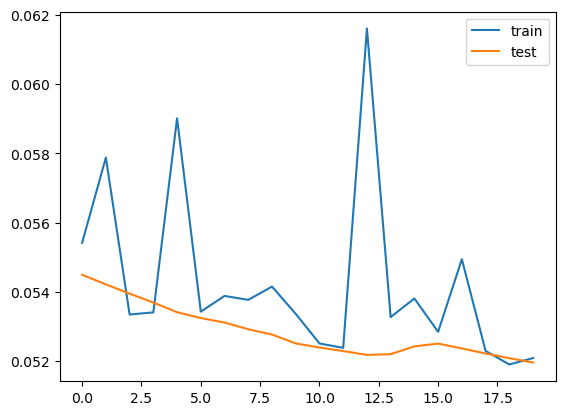

In [79]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [80]:
model.get_weights()[0]

array([[-0.16729558,  0.02107676, -0.01675919, -0.1678464 ,  0.03730968,
         0.16460899, -0.20314337,  0.13975148,  0.18361972, -0.04897126,
        -0.21116848, -0.1857586 , -0.00160648,  0.0639355 , -0.05020213,
        -0.15942219,  0.13842508,  0.1054621 , -0.13317136, -0.15837374,
        -0.08325823,  0.16398048,  0.19419043, -0.10951161,  0.20301999,
        -0.01869537, -0.1754114 ,  0.18605722,  0.08036905, -0.10888738,
        -0.10570233,  0.00822261,  0.0554041 , -0.18607485, -0.11140309,
         0.01548679,  0.04482444,  0.16355683, -0.06864278,  0.14575073,
        -0.09950022,  0.0643444 ,  0.03338426, -0.18764742,  0.21306403,
         0.00211086, -0.15363078, -0.03595801,  0.19005044, -0.1918965 ,
         0.12243695, -0.06822853,  0.16772531, -0.01193134,  0.05702083,
         0.1745234 ,  0.20026545,  0.149655  , -0.09633815,  0.03359138,
         0.0179334 ,  0.1765923 ,  0.11167367, -0.03944678, -0.03153848,
        -0.07275929, -0.106134  , -0.14265078,  0.0

In [82]:
pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
     -                                        0.0/1.4 MB 991.0 kB/s eta 0:00:02
     --                                       0.1/1.4 MB 787.7 kB/s eta 0:00:02
     ---                                      0.1/1.4 MB 901.1 kB/s eta 0:00:02
     ----                                     0.2/1.4 MB 919.0 kB/s eta 0:00:02
     ------                                   0.2/1.4 MB 962.7 kB/s eta 0:00:02
     --------                                 0.3/1.4 MB 983.9 kB/s eta 0:00:02
     ----------                               0.4/1.4 MB 1.1 MB/s eta 0:00:01
     ----------                               0.4/1.4 MB 1.0 MB/s eta 0:00:01
     -------------                            0.5/1.4 MB 1.1 MB/s eta 0:00:01
     ---------------                          0.5/1.4 MB 1.1 MB/s eta 0:00:01
     ---------------                          0.5/1.4 MB 1.1 MB/s eta 0:00:01
     ----------------                         0.6/1.4 MB 1.

In [92]:
y_train.astype

<bound method NDFrame.astype of 129    0
232    0
195    0
277    0
280    0
      ..
188    0
71     0
106    1
270    0
102    0
Name: Owner, Length: 225, dtype: int64>

In [107]:
predict = pd.DataFrame(model.predict(x_test) > 0.1,columns=['Predict'])

3/3 [==============================] - 0s 8ms/step


In [109]:
predict[predict['Predict'] == True]

,Predict
41,True


In [112]:
y_test[y_test == 1]

198    1
184    1
Name: Owner, dtype: int64

In [113]:
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 0s/step


In [118]:
from tensorflow.keras.callbacks import EarlyStopping